Epoch 1/10
422/422 - 10s - 24ms/step - accuracy: 0.8530 - loss: 0.4847 - val_accuracy: 0.9570 - val_loss: 0.1468
Epoch 2/10
422/422 - 5s - 13ms/step - accuracy: 0.9376 - loss: 0.2106 - val_accuracy: 0.9685 - val_loss: 0.1047
Epoch 3/10
422/422 - 5s - 11ms/step - accuracy: 0.9535 - loss: 0.1571 - val_accuracy: 0.9743 - val_loss: 0.0911
Epoch 4/10
422/422 - 4s - 10ms/step - accuracy: 0.9606 - loss: 0.1307 - val_accuracy: 0.9750 - val_loss: 0.0819
Epoch 5/10
422/422 - 5s - 13ms/step - accuracy: 0.9663 - loss: 0.1124 - val_accuracy: 0.9770 - val_loss: 0.0771
Epoch 6/10
422/422 - 12s - 28ms/step - accuracy: 0.9708 - loss: 0.0978 - val_accuracy: 0.9773 - val_loss: 0.0734
Epoch 7/10
422/422 - 9s - 21ms/step - accuracy: 0.9726 - loss: 0.0889 - val_accuracy: 0.9788 - val_loss: 0.0719
Epoch 8/10
422/422 - 9s - 22ms/step - accuracy: 0.9753 - loss: 0.0794 - val_accuracy: 0.9788 - val_loss: 0.0703
Epoch 9/10
422/422 - 5s - 11ms/step - accuracy: 0.9777 - loss: 0.0721 - val_accuracy: 0.9795 - val_los

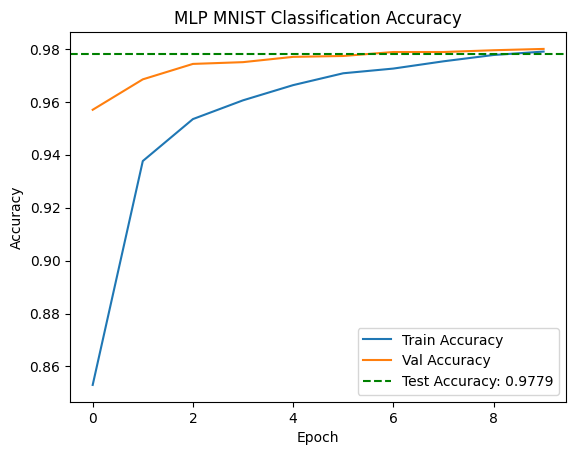

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
# Import Input and Dropout
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
 
# Load The MNIST Data Set
(x_train, y_train), (x_test, y_test) = mnist.load_data()
 
# Preprocess data
x_train = x_train.astype('float32') / 255.0 # normalize to[0,1]
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)  #one-hot encode
y_test = to_categorical(y_test, 10)
 
# Build The Sequential Model
model = Sequential([
    # 1. Use an explicit Input layer instead of input_shape in Flatten
    Input(shape=(28, 28)), 
    Flatten(),
    
    Dense(128, activation='relu'),
    # 2. Add Dropout to reduce overfitting
    Dropout(0.2), 
    
    Dense(64, activation='relu'),
    # 2. Add Dropout again
    Dropout(0.2), 
    
    Dense(10, activation='softmax')
])
 
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
 
# Train The model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1,
                    verbose=2)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot Training History
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.axhline(y=test_accuracy, color='green', linestyle='--', label=f'Test Accuracy: {test_accuracy:.4f}')
plt.title('MLP MNIST Classification Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()